### Загрузим данные:

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

from estimators import DelayEstimator, EmbeddingDimensionEstimator
from delay_embedding import plot_delay_embedding
from data_provider.data_loader import Dataset_ETT_hour


X = Dataset_ETT_hour(
    root_path='../dataset/',
    data_path='ETTh2.csv',
    flag='train',
    features='M',
    scale=False
).data_x

### Вычислим tau:

Первый локальный минимум τ: 14
Первый локальный максимум τ: 24


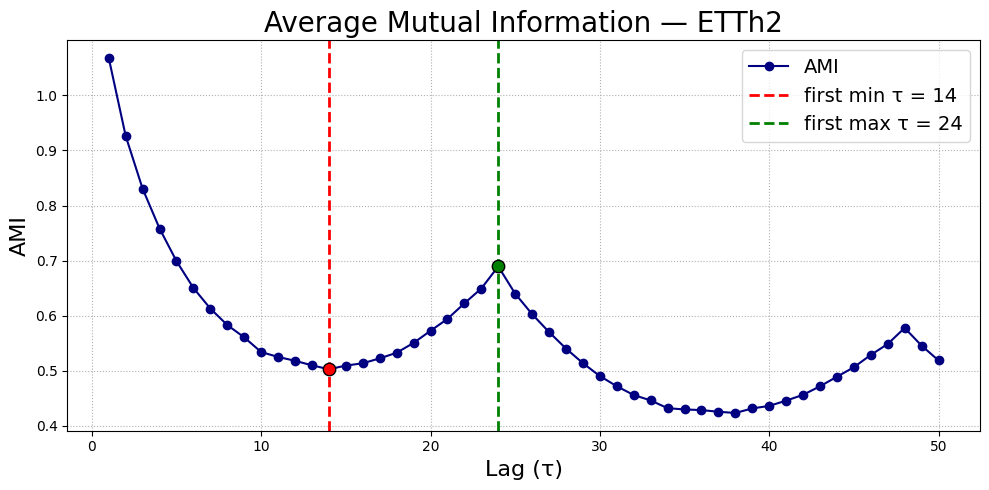

In [2]:
delay_est = DelayEstimator(max_tau=50, data_name="ETTh2").fit(X)
print(f"Первый локальный минимум τ: {delay_est.tau_min}")
print(f"Первый локальный максимум τ: {delay_est.tau_max}")
delay_est.plot()

### Вычислим m:

Оптимальная размерность m: 30
Покрытие каналов: 85.7%


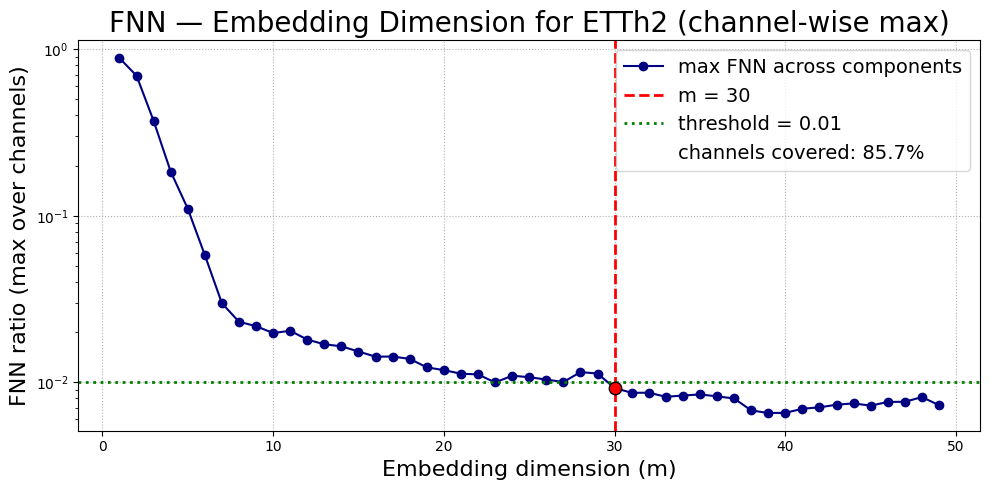

In [3]:
dim_est = EmbeddingDimensionEstimator(tau=delay_est.tau_min, m_max=50, data_name="ETTh2", multivariate=False).fit(X)
print(f"Оптимальная размерность m: {dim_est.m_opt}")
print(f"Покрытие каналов: {dim_est.coverage_ratio * 100:.1f}%")
dim_est.plot()

### Визуализируем полученные эмбеддинги:

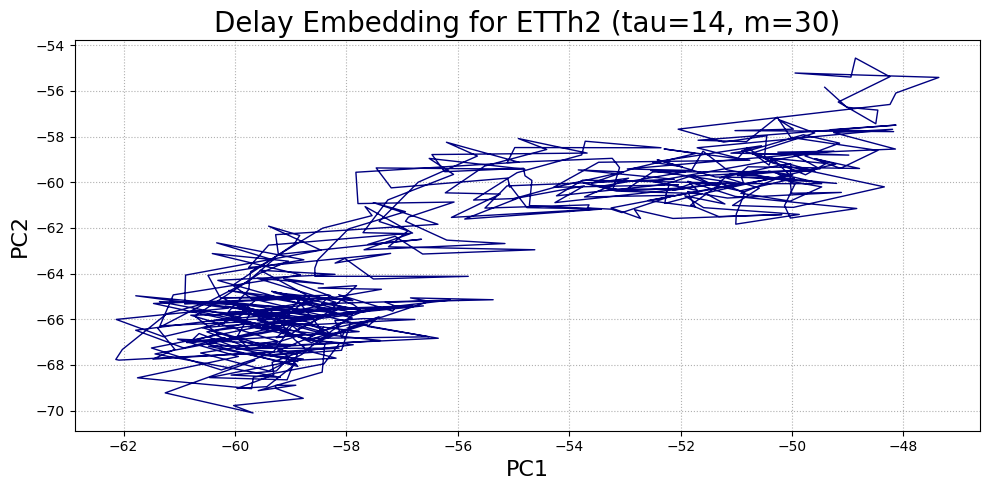

In [30]:
plot_delay_embedding(X, tau=delay_est.tau_min, m=dim_est.m_opt, data_name="ETTh2", left=4500, right=5000)

### Визуализируем оптимальные эмбеддинги:

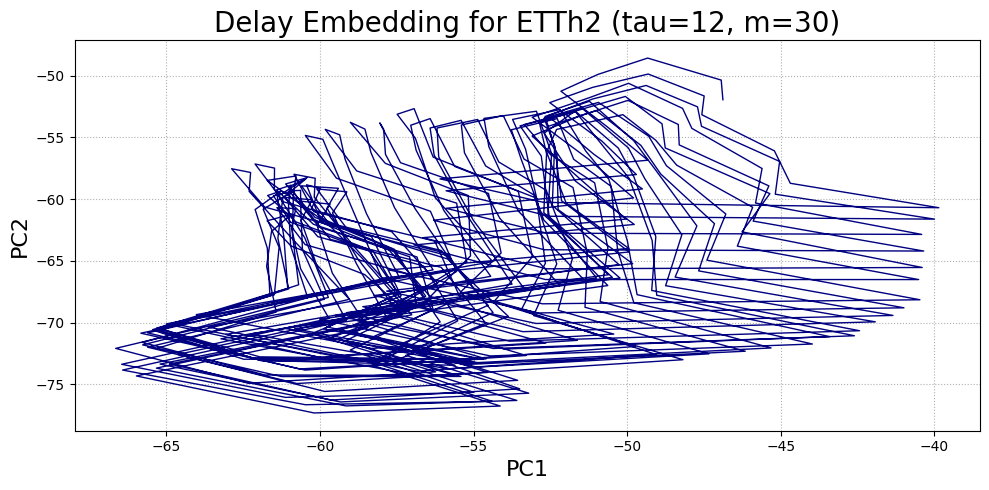

In [28]:
plot_delay_embedding(X, tau=12, m=30, data_name="ETTh2", left=4500, right=5000)

### Визуализируем эмбеддинги из оригинальной статьи:

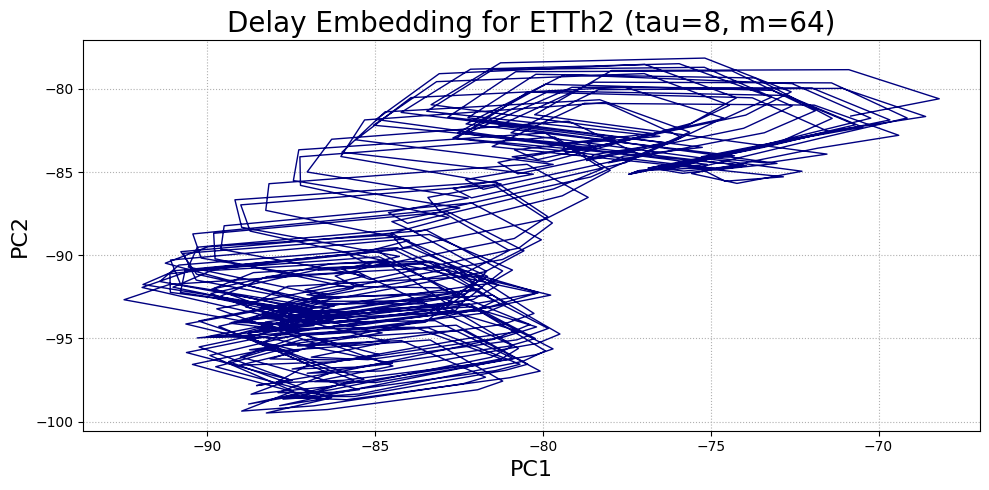

In [29]:
plot_delay_embedding(X, tau=8, m=64, data_name="ETTh2", left=4500, right=5000)

Видим, что вычисленные нами эмбеддинги порядком хуже, чем предложенные в оригинальной статье.